# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Import Data

In [3]:
path = r'C:\Users\david\04-06-2024 Instacart Basket Analysis'

In [4]:
ords_prods_merge = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'ords_prods_merge_4-8.pkl'))

In [5]:
ords_prods_merge.head()

,Unnamed: 0.1,Unnamed: 0_x,order_id,user_id,order_ordinal_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,...,prices,price_range_loc,busiest_day,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_days_between_orders,order_frequency
0,0,0,2539329,1,1,2,8,NaN,True,196,...,9.0,Mid-range product,Regularly busy,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
1,1,1,2398795,1,2,3,7,15.0,False,196,...,9.0,Mid-range product,Least busy days,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
2,2,2,473747,1,3,3,12,21.0,False,196,...,9.0,Mid-range product,Least busy days,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
3,3,3,2254736,1,4,4,7,29.0,False,196,...,9.0,Mid-range product,Least busy days,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
4,4,4,431534,1,5,4,15,28.0,False,196,...,9.0,Mid-range product,Least busy days,Most orders - Top 5 Hours,10,New customer,6.367797,Low spender,20.5,Non-frequent customer


# Creating a bar chart

<Axes: xlabel='order_day_of_week'>

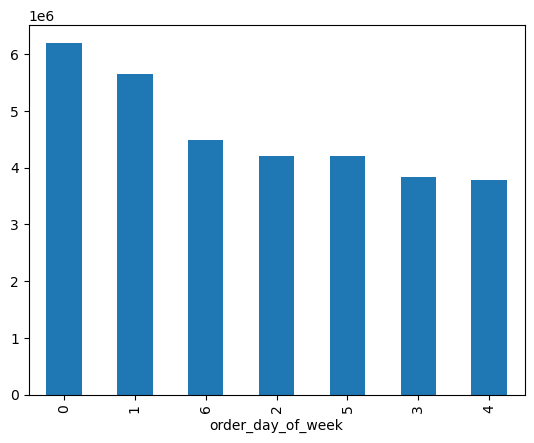

In [6]:
ords_prods_merge['order_day_of_week'].value_counts().plot.bar()

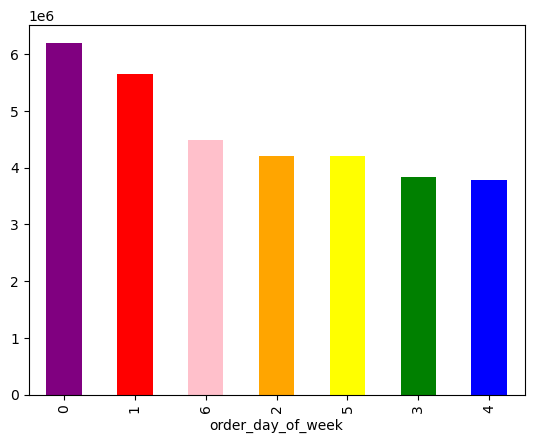

In [7]:
bar = ords_prods_merge['order_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [8]:
bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_orders_dow.png'))

# Creating histogram

<Axes: ylabel='Frequency'>

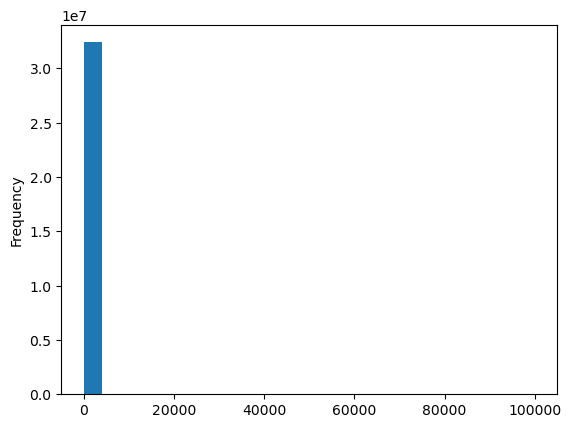

In [9]:
# a large outlier in price is causing the histogram to be skewed and unhelpful.
ords_prods_merge['prices'].plot.hist(bins = 25)

# Scatterplot

<Axes: xlabel='prices', ylabel='prices'>

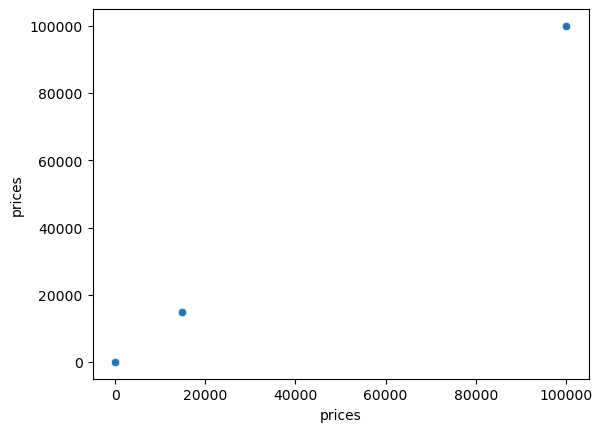

In [10]:
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [11]:
# checking for outliers
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,Unnamed: 0.1,Unnamed: 0_x,order_id,user_id,order_ordinal_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,...,prices,price_range_loc,busiest_day,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_days_between_orders,order_frequency
10030345,171,171,912404,17,12,2,14,5.0,False,21553,...,14900.0,High-range product,Regularly busy,Most orders - Top 5 Hours,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030346,181,181,603376,17,22,6,16,4.0,False,21553,...,14900.0,High-range product,Regularly busy,Average Orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030347,1944,1944,3264360,135,2,2,21,13.0,False,21553,...,14900.0,High-range product,Regularly busy,Average Orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030348,1945,1945,892534,135,3,0,8,12.0,False,21553,...,14900.0,High-range product,Busiest days,Average Orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030349,5708,5708,229704,342,8,1,19,30.0,False,21553,...,14900.0,High-range product,Busiest days,Average Orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,3386542,3386542,2249946,204099,29,0,8,4.0,False,33664,...,99999.0,High-range product,Busiest days,Average Orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166210,3386544,3386544,2363282,204099,31,0,9,2.0,False,33664,...,99999.0,High-range product,Busiest days,Average Orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166211,3391313,3391313,3181945,204395,13,3,15,8.0,False,33664,...,99999.0,High-range product,Least busy days,Most orders - Top 5 Hours,15,Regular customer,451.153540,High spender,5.0,Frequent customer
29166212,3405096,3405096,2486215,205227,7,3,20,4.0,False,33664,...,99999.0,High-range product,Least busy days,Average Orders,12,Regular customer,1178.381871,High spender,12.0,Regular customer


In [12]:
# marks rows with price higher than 100 missing
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [13]:
ords_prods_merge['prices'].max()

25.0

# Histogram Attempt 2

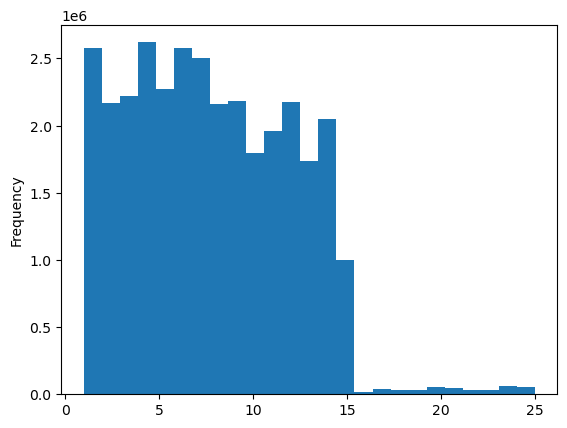

In [14]:
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

# Creating sampling distribution

In [15]:
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [16]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [17]:
# stores 70% of sample in dataframe big
big = ords_prods_merge[dev]
# stores 30% of sample in dataframe small
small = ords_prods_merge[~dev]

In [18]:
len(ords_prods_merge)

32404859

In [19]:
# same number of rows
len(big) + len(small)

32404859

In [20]:
df_2 = small[['order_day_of_week', 'prices']]

In [ ]:
line = sns.lineplot(data = df_2, x = 'order_day_of_week',y = 'prices')


C:\Users\david\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\david\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


# Part II

## Q1: Data and library Import

In [23]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [24]:
path = path = r'C:\Users\david\04-06-2024 Instacart Basket Analysis'

In [25]:
ords_prods_customers = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'ords_prods_customers.pkl'))

In [26]:
ords_prods_customers.shape

(32404859, 36)

## Q3: Histogram of order_hour_of_day

Text(0, 0.5, 'Frequency')

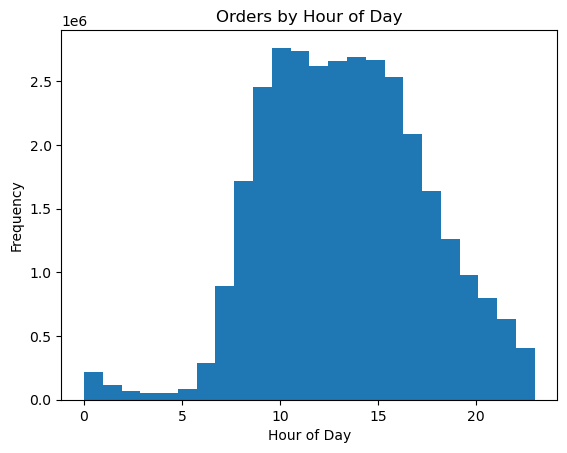

In [27]:
hist = ords_prods_customers['order_hour_of_day'].plot.hist(bins = 24)
plt.title('Orders by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')

Observations: Orders peak between hours 9 and 16. Lowest amount of orders take place around 4.

## Q4: Bar chart using loyalty flag

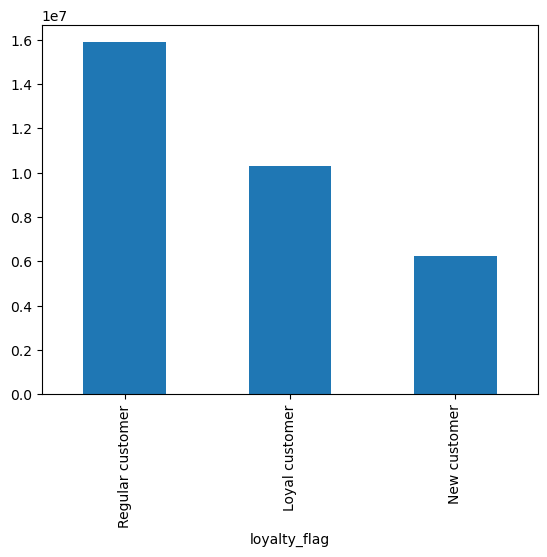

In [9]:
bar = ords_prods_customers['loyalty_flag'].value_counts().plot.bar()

## Q5: Finding difference in expenditure between hours of day - (Line chart probably)

In [29]:
# removing price outliers
ords_prods_customers.loc[ords_prods_customers['prices'] >100, 'prices'] = np.nan

In [30]:
np.random.seed(4)
dev = np.random.rand(len(ords_prods_customers)) <= 0.7

In [31]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [32]:
# stores 70% of sample in dataframe big
big = ords_prods_customers[dev]
# stores 30% of sample in dataframe small
small = ords_prods_customers[~dev]

In [33]:
df_2 = small[['order_hour_of_day', 'prices']]

In [34]:
df_2.head(5)

,order_hour_of_day,prices
0,8,9.0
2,12,9.0
3,7,9.0
6,9,9.0
10,8,12.5


C:\Users\david\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\david\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


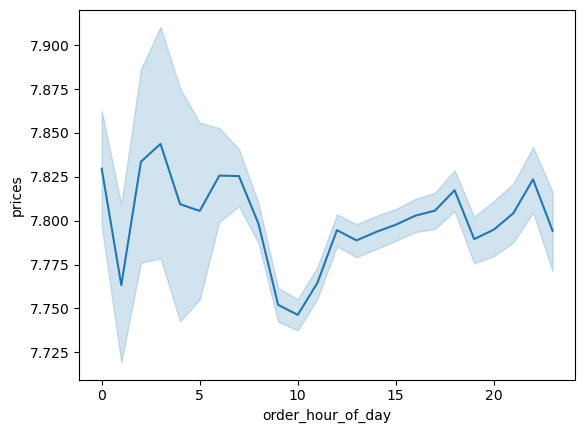

In [35]:
line = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

## Q6: Connection between age and family situtation (age x number of dependents)

In [48]:
df_3 = small [['age','n_dependants']]

In [49]:
df_3.head(5)

,age,n_dependants
0,31,3
2,31,3
3,31,3
6,31,3
10,31,3


C:\Users\david\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\david\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


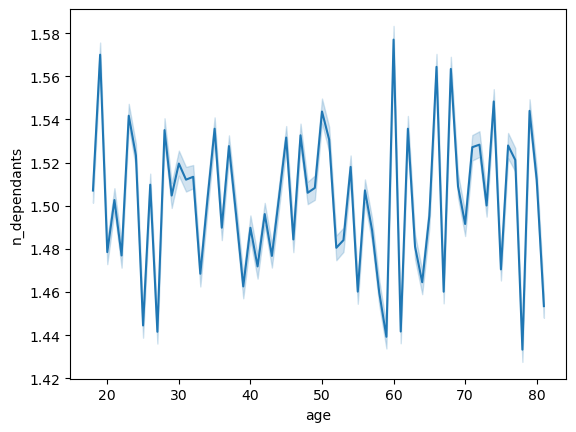

In [50]:
line_2 = sns.lineplot(data = df_3, x = 'age',y = 'n_dependants')

No clear relationship between age and number of dependents.

## Q7: Scatterplot (Age X Income)

In [39]:
df_4 = small[['age', 'income']]

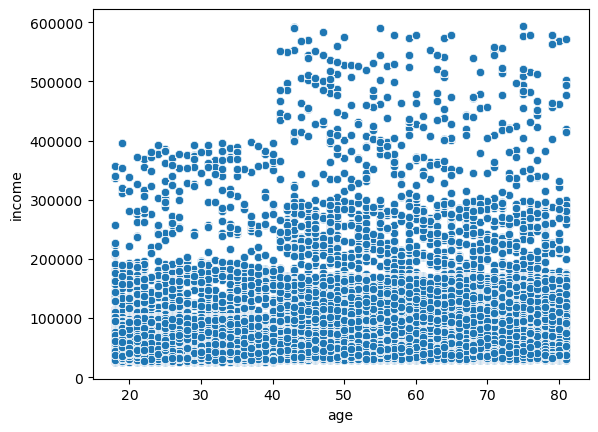

In [40]:
scatterplot = sns.scatterplot(x = 'age', y = 'income',data = ords_prods_customers)

From the graph, a few things can be understood.

There is a positive relationship between age and income.

Of those who make more than 20,000$ yearly, they are more likely to be
  over the age of 40. (Those over 40 make more on average than those younger than 40
  
Nobody between the ages of 20 and 40 made more than 40,000$.

# Visualizations Export

In [41]:
hist.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'hist_order_hour_of_day.png'))

In [42]:
bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_loyalty_flag.png'))

In [52]:
line.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'line_chart_price_vs_hour_of_day.png'))

In [51]:
line_2.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'line_chart_age_vs_dependents.png'))

In [46]:
scatterplot.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'scatterplot_income_vs_age.png'))